In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [20]:
# Load the dataset
df = pd.read_csv('monkeypox.csv')

In [21]:
# Display the first few rows of the dataframe
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [22]:
# Explore the dataset
print("Shape of the dataset:\n", df.shape)
print("Info of the dataset:\n", df.info())
print("Summary statistics:\n", df.describe())
print("Checking for missing values:\n", df.isnull().sum())

Shape of the dataset:
 (25000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB
Info of the dataset:
 Non

In [23]:
df.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,3,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


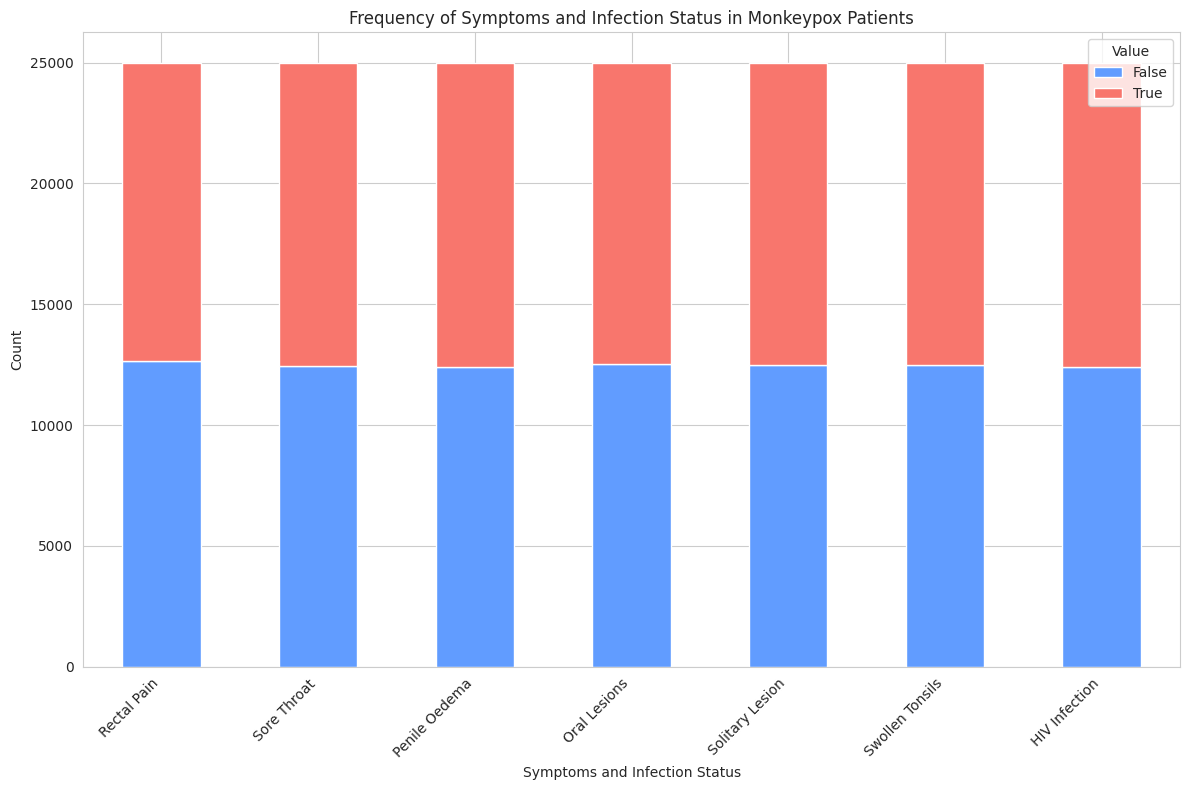

In [36]:
# Convert boolean columns to integer for counting
df_encoded = df[bool_columns].astype(int)

# Count the occurrences of each value in boolean columns
bool_counts = df_encoded.apply(pd.Series.value_counts).fillna(0).T

# Combine the counts
# symptom_counts = pd.concat([categorical_counts, bool_counts], axis=0)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bar chart with the combined counts
bool_counts.plot(kind='bar', stacked=True, ax=ax, color=['#619CFF', '#F8766D'])

# Set labels and title
ax.set_xlabel('Symptoms and Infection Status')
ax.set_ylabel('Count')
ax.set_title('Frequency of Symptoms and Infection Status in Monkeypox Patients')
ax.legend(title='Value', labels=['False', 'True'])

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
categorical_counts

,Systemic Illness,MonkeyPox
Fever,6382.0,0.0
Muscle Aches and Pain,6150.0,0.0
Negative,0.0,9091.0
Positive,0.0,15909.0
Swollen Lymph Nodes,6252.0,0.0


In [32]:
symptom_counts

,Systemic Illness,MonkeyPox,0,1
Fever,6382.0,0.0,NaN,NaN
Muscle Aches and Pain,6150.0,0.0,NaN,NaN
Negative,0.0,9091.0,NaN,NaN
Positive,0.0,15909.0,NaN,NaN
Swollen Lymph Nodes,6252.0,0.0,NaN,NaN
Rectal Pain,NaN,NaN,12655.0,12345.0
Sore Throat,NaN,NaN,12446.0,12554.0
Penile Oedema,NaN,NaN,12388.0,12612.0
Oral Lesions,NaN,NaN,12514.0,12486.0
Solitary Lesion,NaN,NaN,12473.0,12527.0


In [5]:
# Handle missing values if any (example: dropping missing values)
df.dropna(inplace=True)

In [6]:
df.shape

(18784, 11)

In [7]:
df = df.drop('Patient_ID', axis = 1)

In [8]:
# Encode categorical variables if any
# Assuming 'target' is the name of the target column and other categorical columns need encoding
label_encoders = {}
for column in df.select_dtypes(include=['object', 'bool']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [9]:
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,0,1,0,1,1,0,0,1,0,1
2,0,0,1,1,0,0,0,1,0,1
4,2,1,1,1,0,0,1,1,0,1
5,2,0,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,1


In [10]:
X = df.drop('MonkeyPox', axis = 1)
y = df['MonkeyPox']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return accuracy

In [13]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [14]:
# Evaluate each model
model_accuracies = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)
    model_accuracies[model_name] = accuracy

Evaluating Random Forest
Accuracy: 0.6933723715730636
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.29      0.37      1173
           1       0.73      0.88      0.80      2584

    accuracy                           0.69      3757
   macro avg       0.62      0.58      0.59      3757
weighted avg       0.66      0.69      0.66      3757

Confusion Matrix:
 [[ 344  829]
 [ 323 2261]]
Evaluating Support Vector Machine
Accuracy: 0.7104072398190046
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.22      0.33      1173
           1       0.73      0.93      0.82      2584

    accuracy                           0.71      3757
   macro avg       0.66      0.58      0.57      3757
weighted avg       0.69      0.71      0.66      3757

Confusion Matrix:
 [[ 263  910]
 [ 178 2406]]
Evaluating K-Nearest Neighbors
Accuracy: 0.660367314346553
Classification Report:
       

In [15]:
# Display model accuracies
print("Model Accuracies:", model_accuracies)

Model Accuracies: {'Random Forest': 0.6933723715730636, 'Support Vector Machine': 0.7104072398190046, 'K-Nearest Neighbors': 0.660367314346553, 'Logistic Regression': 0.7000266169816343, 'Decision Tree': 0.6861857865318073, 'Gradient Boosting': 0.7154644663295182, 'XGBoost': 0.6994942773489486}


In [16]:
# Hyperparameter tuning for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Randomized Search
param_dist_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters for Random Forest: ", random_search_rf.best_params_)

# Evaluate the best model with optimized hyperparameters
best_rf_model = random_search_rf.best_estimator_
evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20

0.691243013042321

In [18]:
# Hyperparameter tuning for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the model
knn_model = KNeighborsClassifier()

# Perform Grid Search
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters for KNN: ", grid_search_knn.best_params_)

# Evaluate the best model with optimized hyperparameters
best_knn_model = grid_search_knn.best_estimator_
evaluate_model(best_knn_model, X_train, y_train, X_test, y_test)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=5, we

0.691243013042321

In [19]:
# Hyperparameter tuning for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'saga', 'liblinear', 'sag'],
    'max_iter': [100, 200, 500]
}

# Initialize the model
lr_model = LogisticRegression(random_state=42)

# Perform Grid Search
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters for Logistic Regression: ", grid_search_lr.best_params_)

# Evaluate the best model with optimized hyperparameters
best_lr_model = grid_search_lr.best_estimator_
evaluate_model(best_lr_model, X_train, y_train, X_test, y_test)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, s

0.7005589566143199

In [20]:
# Hyperparameter tuning for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters for Decision Tree: ", grid_search_dt.best_params_)

# Evaluate the best model with optimized hyperparameters
best_dt_model = grid_search_dt.best_estimator_
evaluate_model(best_dt_model, X_train, y_train, X_test, y_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[C

0.6861857865318073

In [27]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Perform Grid Search
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters for Gradient Boosting: ", grid_search_gb.best_params_)

# Evaluate the best model with optimized hyperparameters
best_gb_model = grid_search_gb.best_estimator_
evaluate_model(best_gb_model, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9

0.7178599946766037

In [16]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform Grid Search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters for XGBoost: ", grid_search_xgb.best_params_)

# Evaluate the best model with optimized hyperparameters
best_xgb_model = grid_search_xgb.best_estimator_
evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END

0.718924673941975

In [17]:
# Hyperparameter tuning for the best model
best_model = SVC()

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [18]:
# Coarse Grid Search
coarse_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

coarse_grid_search = GridSearchCV(estimator=best_model, param_grid=coarse_param_grid, cv=5, n_jobs=-1, verbose=2)
coarse_grid_search.fit(X_train, y_train)

# Fine Grid Search around best parameters found in coarse search
best_params = coarse_grid_search.best_params_
fine_param_grid = {
    'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
    'gamma': [best_params['gamma'] * 0.5, best_params['gamma'], best_params['gamma'] * 2],
    'kernel': [best_params['kernel']]
}

fine_grid_search = GridSearchCV(estimator=best_model, param_grid=fine_param_grid, cv=5, n_jobs=-1, verbose=2)
fine_grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters found: ", fine_grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   8.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   8.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   7.8s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   8.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   7.9s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  11.4s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  10.8s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  11.4s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  10.8s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  11.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  16.3s
[CV] END .......................C=0.1, gamma=0.

In [24]:
# Evaluate the best model with optimized hyperparameters
best_model = fine_grid_search.best_estimator_
evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Hyperparameter tuning results visualization
results = pd.DataFrame(fine_grid_search.cv_results_)
scores = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

Accuracy: 0.7159968059622039
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.25      0.36      1173
           1       0.73      0.93      0.82      2584

    accuracy                           0.72      3757
   macro avg       0.67      0.59      0.59      3757
weighted avg       0.69      0.72      0.67      3757

Confusion Matrix:
 [[ 297  876]
 [ 191 2393]]


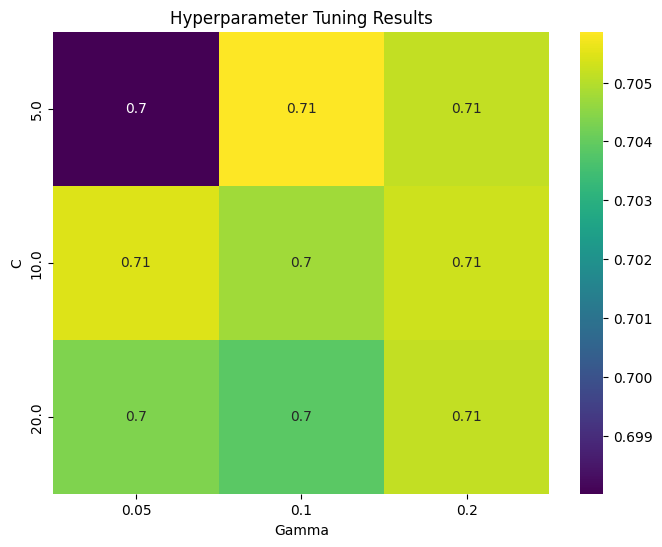

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis')
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [26]:
# Coarse Grid Search
coarse_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

coarse_grid_search = GridSearchCV(estimator=best_model, param_grid=coarse_param_grid, cv=5, n_jobs=-1, verbose=2)
coarse_grid_search.fit(X_train, y_train)

# Fine Grid Search around best parameters found in coarse search
best_params = coarse_grid_search.best_params_
fine_param_grid = {
    'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
    'gamma': [best_params['gamma'] * 0.5, best_params['gamma'], best_params['gamma'] * 2],
    'kernel': [best_params['kernel']]
}

fine_grid_search = GridSearchCV(estimator=best_model, param_grid=fine_param_grid, cv=5, n_jobs=-1, verbose=2)
fine_grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters found: ", fine_grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   8.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   8.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   8.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.2min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.5min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.4min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.9min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  14.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  14.2s
[CV] END .........................C=0.1, gamma=

In [ ]:
# Evaluate the best model with optimized hyperparameters
best_model = fine_grid_search.best_estimator_
evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Hyperparameter tuning results visualization
results = pd.DataFrame(fine_grid_search.cv_results_)
scores = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis')
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [19]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  35.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  44.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  40.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  54.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   7.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   7.3s
[CV] END ...................

In [19]:
# Display the best parameters
print("Best Parameters found: ", grid_search.best_params_)

NameError: name 'grid_search' is not defined

In [ ]:
# Evaluate the best model with optimized hyperparameters
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_train, y_train, X_test, y_test)

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis')
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

NameError: name 'scores' is not defined

<Figure size 800x600 with 0 Axes>